# EDA - Exploratory Data Analysis
## ניתוח קובץ labels_all.csv

מחברת זו מבצעת ניתוח חקירתי של נתוני התוויות (labels) עבור פרויקט זיהוי דיכאון מתוך מסד הנתונים DAIC-WOZ.

In [1]:
# ייבוא ספריות
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# הגדרות תצוגה
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# הגדרה לתמיכה בעברית (אם נדרש)
plt.rcParams['axes.unicode_minus'] = False

## 1. טעינת הנתונים

In [2]:
# טעינת הנתונים
df = pd.read_csv('../data/labels_all.csv')

# הצגת השורות הראשונות
print("5 השורות הראשונות:")
df.head()

5 השורות הראשונות:


,Participant_ID,PHQ_Binary,split
0,303,0,train
1,304,0,train
2,305,0,train
3,310,0,train
4,312,0,train


In [ ]:
# הצגת השורות האחרונות

print("5 השורות האחרונות:")
df.tail()

5 השורות האחרונות:


,Participant_ID,PHQ_Binary,split
184,467,0,test
185,469,0,test
186,470,0,test
187,480,0,test
188,481,0,test


## 2. מידע בסיסי על הנתונים

In [4]:
# מידע כללי
print(f"מספר שורות: {len(df)}")
print(f"מספר עמודות: {len(df.columns)}")
print(f"\nשמות העמודות: {list(df.columns)}")

מספר שורות: 189
מספר עמודות: 3

שמות העמודות: ['Participant_ID', 'PHQ_Binary', 'split']


In [5]:
# סוגי הנתונים
print("סוגי נתונים לכל עמודה:")
df.dtypes

סוגי נתונים לכל עמודה:


Participant_ID     int64
PHQ_Binary         int64
split             object
dtype: object

In [6]:
# מידע מפורט
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Participant_ID  189 non-null    int64 
 1   PHQ_Binary      189 non-null    int64 
 2   split           189 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.6+ KB


## 3. סטטיסטיקות תיאוריות

In [7]:
# סטטיסטיקות תיאוריות לעמודות מספריות
df.describe()

,Participant_ID,PHQ_Binary
count,189.000000,189.000000
mean,395.947090,0.296296
std,56.117822,0.457836
min,300.000000,0.000000
25%,348.000000,0.000000
50%,396.000000,0.000000
75%,444.000000,1.000000
max,492.000000,1.000000


## 4. בדיקת ערכים חסרים

In [8]:
# ערכים חסרים לפי עמודה
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'ערכים חסרים': missing_values,
    'אחוז חסר': missing_percent
})

print("ערכים חסרים:")
print(missing_df)
print(f"\nסה\"כ ערכים חסרים: {df.isnull().sum().sum()}")

ערכים חסרים:
                ערכים חסרים  אחוז חסר
Participant_ID            0       0.0
PHQ_Binary                0       0.0
split                     0       0.0

סה"כ ערכים חסרים: 0


## 5. התפלגות משתנה היעד (PHQ_Binary)

In [9]:
# ספירת ערכים
phq_counts = df['PHQ_Binary'].value_counts().sort_index()

print("התפלגות PHQ_Binary:")
print(f"  לא מדוכא (0): {phq_counts[0]} ({phq_counts[0]/len(df)*100:.1f}%)")
print(f"  מדוכא (1): {phq_counts[1]} ({phq_counts[1]/len(df)*100:.1f}%)")
print(f"\nיחס אי-איזון (Imbalance Ratio): {phq_counts[0]/phq_counts[1]:.2f}:1")

התפלגות PHQ_Binary:
  לא מדוכא (0): 133 (70.4%)
  מדוכא (1): 56 (29.6%)

יחס אי-איזון (Imbalance Ratio): 2.38:1


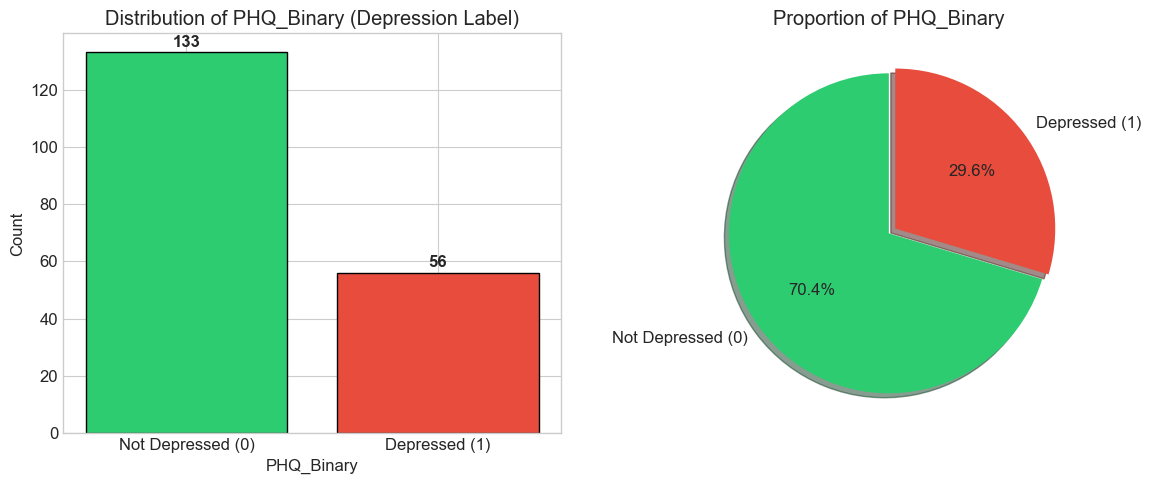

In [10]:
# ויזואליזציה - התפלגות PHQ_Binary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף עמודות
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Not Depressed (0)', 'Depressed (1)'], phq_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('PHQ_Binary')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of PHQ_Binary (Depression Label)')

# הוספת ערכים מעל העמודות
for bar, count in zip(bars, phq_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom', fontweight='bold')

# גרף עוגה
axes[1].pie(phq_counts.values, labels=['Not Depressed (0)', 'Depressed (1)'], 
            autopct='%1.1f%%', colors=colors, explode=(0, 0.05),
            shadow=True, startangle=90)
axes[1].set_title('Proportion of PHQ_Binary')

plt.tight_layout()
plt.show()

## 6. התפלגות לפי Split (Train/Dev/Test)

In [11]:
# ספירת ערכים לפי split
split_counts = df['split'].value_counts()
split_order = ['train', 'dev', 'test']
split_counts = split_counts.reindex(split_order)

print("התפלגות לפי Split:")
for split_name in split_order:
    count = split_counts[split_name]
    print(f"  {split_name}: {count} ({count/len(df)*100:.1f}%)")

התפלגות לפי Split:
  train: 107 (56.6%)
  dev: 35 (18.5%)
  test: 47 (24.9%)


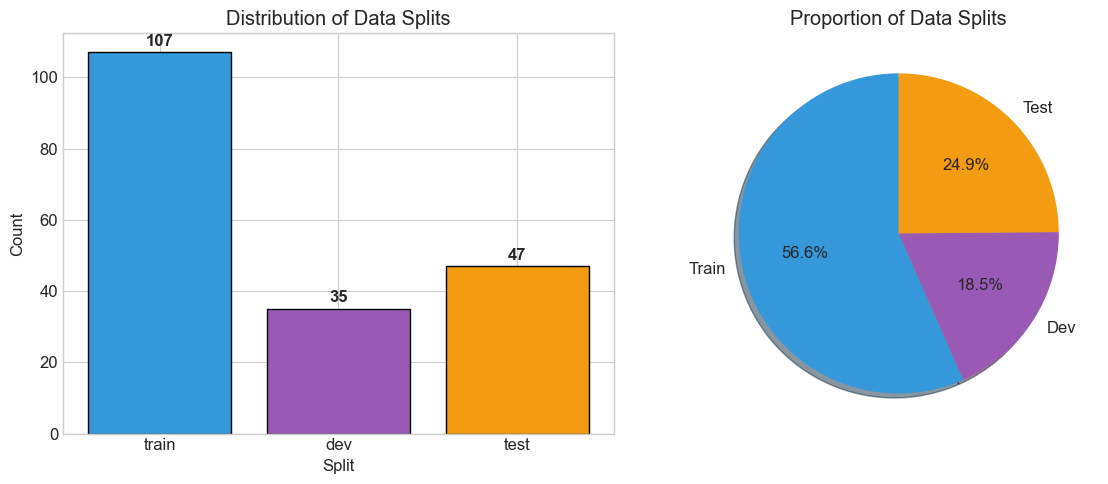

In [12]:
# ויזואליזציה - התפלגות Split
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# גרף עמודות
colors_split = ['#3498db', '#9b59b6', '#f39c12']
bars = axes[0].bar(split_order, split_counts.values, color=colors_split, edgecolor='black')
axes[0].set_xlabel('Split')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Data Splits')

for bar, count in zip(bars, split_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 str(count), ha='center', va='bottom', fontweight='bold')

# גרף עוגה
axes[1].pie(split_counts.values, labels=['Train', 'Dev', 'Test'], 
            autopct='%1.1f%%', colors=colors_split, 
            shadow=True, startangle=90)
axes[1].set_title('Proportion of Data Splits')

plt.tight_layout()
plt.show()

## 7. התפלגות PHQ_Binary לפי Split

In [13]:
# טבלת הצלבה (Cross-tabulation)
cross_tab = pd.crosstab(df['split'], df['PHQ_Binary'], margins=True)
cross_tab.columns = ['Not Depressed (0)', 'Depressed (1)', 'Total']
cross_tab.index = ['dev', 'test', 'train', 'Total']

print("טבלת הצלבה - PHQ_Binary לפי Split:")
cross_tab

טבלת הצלבה - PHQ_Binary לפי Split:


,Not Depressed (0),Depressed (1),Total
dev,23,12,35
test,33,14,47
train,77,30,107
Total,133,56,189


In [14]:
# אחוז דיכאון לפי split
print("אחוז דיכאון (PHQ_Binary=1) לפי Split:")
print("-" * 40)
for split_name in ['train', 'dev', 'test']:
    split_df = df[df['split'] == split_name]
    total = len(split_df)
    depressed = split_df['PHQ_Binary'].sum()
    depression_rate = (depressed / total) * 100
    print(f"{split_name:6s}: {depressed:2d}/{total:2d} = {depression_rate:.1f}% מדוכאים")

אחוז דיכאון (PHQ_Binary=1) לפי Split:
----------------------------------------
train : 30/107 = 28.0% מדוכאים
dev   : 12/35 = 34.3% מדוכאים
test  : 14/47 = 29.8% מדוכאים


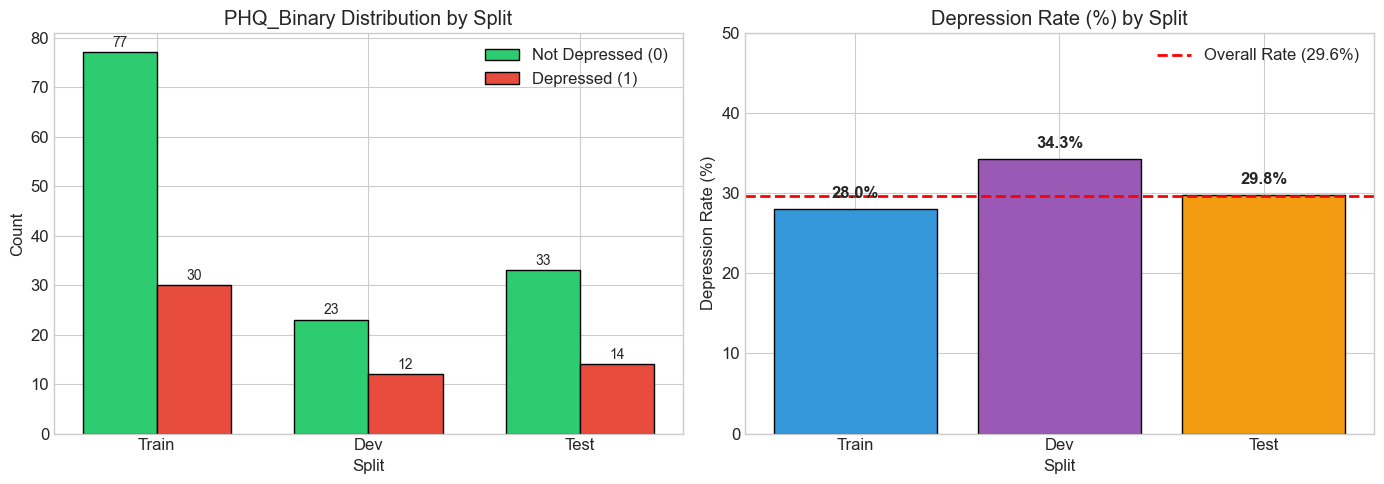

In [15]:
# ויזואליזציה - Stacked Bar Chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# גרף עמודות מקובצות
split_order = ['train', 'dev', 'test']
x = np.arange(len(split_order))
width = 0.35

not_depressed = [len(df[(df['split'] == s) & (df['PHQ_Binary'] == 0)]) for s in split_order]
depressed = [len(df[(df['split'] == s) & (df['PHQ_Binary'] == 1)]) for s in split_order]

bars1 = axes[0].bar(x - width/2, not_depressed, width, label='Not Depressed (0)', color='#2ecc71', edgecolor='black')
bars2 = axes[0].bar(x + width/2, depressed, width, label='Depressed (1)', color='#e74c3c', edgecolor='black')

axes[0].set_xlabel('Split')
axes[0].set_ylabel('Count')
axes[0].set_title('PHQ_Binary Distribution by Split')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Train', 'Dev', 'Test'])
axes[0].legend()

# הוספת ערכים
for bar in bars1:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)
for bar in bars2:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# גרף אחוז דיכאון לפי split
depression_rates = [df[df['split'] == s]['PHQ_Binary'].mean() * 100 for s in split_order]
colors = ['#3498db', '#9b59b6', '#f39c12']
bars = axes[1].bar(['Train', 'Dev', 'Test'], depression_rates, color=colors, edgecolor='black')
axes[1].set_xlabel('Split')
axes[1].set_ylabel('Depression Rate (%)')
axes[1].set_title('Depression Rate (%) by Split')
axes[1].set_ylim(0, 50)

# קו ממוצע כללי
overall_rate = df['PHQ_Binary'].mean() * 100
axes[1].axhline(y=overall_rate, color='red', linestyle='--', linewidth=2, label=f'Overall Rate ({overall_rate:.1f}%)')
axes[1].legend()

for bar, rate in zip(bars, depression_rates):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. ניתוח Participant_ID

In [16]:
# מידע על Participant_ID
print("מידע על Participant_ID:")
print("-" * 40)
print(f"מינימום: {df['Participant_ID'].min()}")
print(f"מקסימום: {df['Participant_ID'].max()}")
print(f"טווח: {df['Participant_ID'].max() - df['Participant_ID'].min()}")
print(f"ערכים ייחודיים: {df['Participant_ID'].nunique()}")
print(f"\nהאם יש כפילויות: {'כן' if df['Participant_ID'].duplicated().any() else 'לא'}")

מידע על Participant_ID:
----------------------------------------
מינימום: 300
מקסימום: 492
טווח: 192
ערכים ייחודיים: 189

האם יש כפילויות: לא


In [17]:
# בדיקת IDs חסרים (gaps)
all_ids = set(range(df['Participant_ID'].min(), df['Participant_ID'].max() + 1))
existing_ids = set(df['Participant_ID'])
missing_ids = sorted(all_ids - existing_ids)

print(f"מספר IDs חסרים בטווח: {len(missing_ids)}")
if len(missing_ids) <= 20:
    print(f"IDs חסרים: {missing_ids}")
else:
    print(f"IDs חסרים (20 ראשונים): {missing_ids[:20]}...")

מספר IDs חסרים בטווח: 4
IDs חסרים: [342, 394, 398, 460]


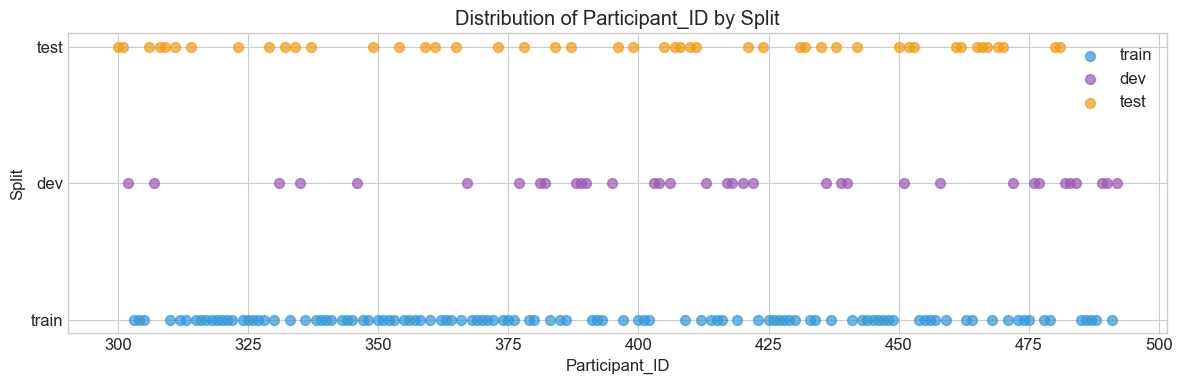

In [18]:
# התפלגות Participant_ID
fig, ax = plt.subplots(figsize=(12, 4))

colors_map = {'train': '#3498db', 'dev': '#9b59b6', 'test': '#f39c12'}
for split_name in ['train', 'dev', 'test']:
    split_df = df[df['split'] == split_name]
    ax.scatter(split_df['Participant_ID'], [split_name] * len(split_df), 
               c=[colors_map[split_name]], s=50, alpha=0.7, label=split_name)

ax.set_xlabel('Participant_ID')
ax.set_ylabel('Split')
ax.set_title('Distribution of Participant_ID by Split')
ax.legend()
plt.tight_layout()
plt.show()

## 9. סיכום

In [19]:
print("=" * 60)
print("סיכום EDA - labels_all.csv")
print("=" * 60)

print(f"""
1. גודל הנתונים:
   - סה"כ משתתפים: {len(df)}
   - עמודות: {len(df.columns)} ({', '.join(df.columns)})

2. איכות הנתונים:
   - ערכים חסרים: {df.isnull().sum().sum()}
   - כפילויות: {'יש' if df['Participant_ID'].duplicated().any() else 'אין'}

3. התפלגות משתנה היעד (PHQ_Binary):
   - לא מדוכא (0): {phq_counts[0]} ({phq_counts[0]/len(df)*100:.1f}%)
   - מדוכא (1): {phq_counts[1]} ({phq_counts[1]/len(df)*100:.1f}%)
   - יחס אי-איזון: {phq_counts[0]/phq_counts[1]:.2f}:1

4. חלוקת הנתונים:
   - Train: {len(df[df['split']=='train'])} משתתפים ({len(df[df['split']=='train'])/len(df)*100:.1f}%)
   - Dev: {len(df[df['split']=='dev'])} משתתפים ({len(df[df['split']=='dev'])/len(df)*100:.1f}%)
   - Test: {len(df[df['split']=='test'])} משתתפים ({len(df[df['split']=='test'])/len(df)*100:.1f}%)

5. מסקנות עיקריות:
   - הנתונים נקיים ללא ערכים חסרים
   - קיים אי-איזון במשתנה היעד (יותר לא-מדוכאים)
   - החלוקה ל-train/dev/test שומרת על פרופורציות דומות של דיכאון
""")

סיכום EDA - labels_all.csv

1. גודל הנתונים:
   - סה"כ משתתפים: 189
   - עמודות: 3 (Participant_ID, PHQ_Binary, split)

2. איכות הנתונים:
   - ערכים חסרים: 0
   - כפילויות: אין

3. התפלגות משתנה היעד (PHQ_Binary):
   - לא מדוכא (0): 133 (70.4%)
   - מדוכא (1): 56 (29.6%)
   - יחס אי-איזון: 2.38:1

4. חלוקת הנתונים:
   - Train: 107 משתתפים (56.6%)
   - Dev: 35 משתתפים (18.5%)
   - Test: 47 משתתפים (24.9%)

5. מסקנות עיקריות:
   - הנתונים נקיים ללא ערכים חסרים
   - קיים אי-איזון במשתנה היעד (יותר לא-מדוכאים)
   - החלוקה ל-train/dev/test שומרת על פרופורציות דומות של דיכאון

